# Railgun Model

Thomas Jagielski and Duncan  Mazza

In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

import math

Assumptions:

    - Constant Current
    - Constant Force
    - The rails are made of iron
    - Projectile is a baseball
   


In [180]:
params = Params(mass_proj = 0.145, #kg
                rail_r = 0.01, #m
                rail_l = 3, #m
                arm_w = 0.9, #m
                arm_l = 0.01, #m
                arm_d = 0.02, #m
                w = 0.1, #m
                #mu = 1150, #T  
                mu = 10, 
                rho_cu = 8960, #g/m^3
                v_init = 0, #m/s
                y_init = 0, #m
                t_end = 1000
                )

,values
mass_proj,0.145
rail_r,0.010
rail_l,3.000
arm_w,0.900
arm_l,0.010
arm_d,0.020
w,0.100
mu,10.000
rho_cu,8960.000
v_init,0.000


In [181]:
def make_system(params):
    """Make a system object.
    
    params: 
    
    returns: System object
    """

    unpack(params)
    
    mass_arm = (arm_w * arm_l * arm_d) * rho_cu

    current = 200
    
    lorentz_force = ((mu * current**2)/(2 * np.pi)) * (math.log((rail_r + w) / rail_r))
    B = ((mu * current)/(2 * np.pi * w)) * (math.log((rail_r + w) / rail_r))
    
    init = State(v=v_init, y=y_init)
    
    return System(params, lorentz_force=lorentz_force, mass_arm = mass_arm, B = B, init=init)

In [182]:
system = make_system(params);

In [183]:
def slope_func(state, t, system):
    
    unpack(system)
    v, y = state
    
    emf = -B * v * w   
    dvdt = (lorentz_force + emf) / (mass_proj + mass_arm)
    dydt = v
        
    return dvdt, dydt

In [184]:
slope_func(system.init, 0, system)

(86844.2111008191, 0.0)

In [185]:
def event_func(state, t, system):
    v, y = state
    return system.rail_l - y

In [186]:
results, details = run_ode_solver(system, slope_func, events = event_func, max_step=0.00001)
details

,values
sol,None
t_events,[[0.017301716880873133]]
nfev,10388
njev,0
nlu,0
status,1
message,A termination event occurred.
success,True


In [187]:
results

,v,y
0.000000,0.000000,0.000000
0.000010,0.866559,0.000004
0.000020,1.729364,0.000017
0.000030,2.588430,0.000039
0.000040,3.443775,0.000069
0.000050,4.295413,0.000108
0.000060,5.143361,0.000155
0.000070,5.987635,0.000211
0.000080,6.828251,0.000275
0.000090,7.665225,0.000347


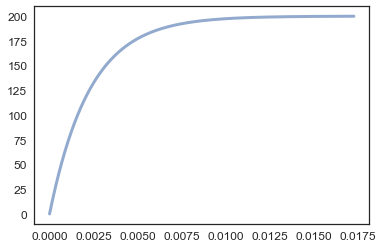

In [188]:
plot(results.v)